## PRiAD 6

# Dane rastrowe (obrazy)


# 1. Wczytanie pakietów, funkcje pomocnicze

Wczytanie niezbędnych pakietów. 

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from skimage import io
import skimage as si
import skimage.filters as sif
import skimage.segmentation as sis
import skimage.measure as sime
import skimage.morphology as simo
import skimage.color as sic

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

Dla uproszczenia składni wprowadzimy funkcje pomocnicze.

In [2]:
#FUNKCJE POMOCNICZE

def pokaz(im, tytul = "", osie = False):
    if not(osie):
        plt.axis("off") 
    if im.ndim == 2:
        plt.imshow(im,cmap='gray')
    else:
        plt.imshow(im)
    plt.title(tytul)
    
def pliob(listaobr, ile_k = 1, listatyt = [], wart_dpi = 100, osie = False):
    # wyswietla liste obrazow kolorowych lub s skali szarosci
    rozm_obr = 5
    ile = len(listaobr)
    if len(listatyt) == 0:
        listatyt = [' ']*ile
    ile_w = np.ceil(ile / ile_k).astype(int)
    figsize_k = rozm_obr*ile_k
    figsize_w = rozm_obr*ile_w
    plt.figure(figsize=(figsize_k,figsize_w), dpi = wart_dpi)
    for i in range(0,ile):
        if isinstance(listaobr[i],np.ndarray):
            plt.subplot(ile_w,ile_k,i+1)
            pokaz(listaobr[i], listatyt[i], osie)
    plt.show()
    
    
# funkcja wyświetlająca obraz wraz z jego histogramem
def pokazhist(obraz):
    plt.figure(figsize=(10,5), dpi= 80)

    plt.subplot(1,2,1)
    pokaz(obraz)
    plt.subplot(1,2,2)
    if obraz.ndim == 3:
        color = ('b','g','r')
        for i,col in enumerate(color):
            plt.hist(obraz[:,:,i].ravel(), bins = 256, color = col)
            plt.xlim([0,256])
        plt.show()
    else:
        histr = np.histogram(obraz, bins = 256)
        plt.hist(obraz.ravel(), bins = 256)
        plt.xlim([0,256])
        plt.show()    
        
# wyswielanie obrazu oraz wyniku zastosowania LUT
def pokazlut(obr,lut):
    obrwyj = obr.copy()
    obrwyj = lut[obr]
    plt.figure(figsize=(15,5), dpi= 80)
    plt.subplot(1,3,1)
    pokaz(obr)
    plt.subplot(1,3,2)
    plt.plot(lut, color = 'b' )
    plt.xlim([0,256])
    plt.ylim([0,256])
    plt.subplot(1,3,3)
    pokaz(obrwyj)
    return obrwyj

# 2. Metody punktowe

Wartość piksela obrazu wyjściowego w metodach punktowych zalezy tylko i wyłącznie od piksela o tych samych współrzędnych na obrazie wejściowym. Zalezność tą opisuje **krzywa tonalna** - funkcja przedstawiająca zależność jasności na obrazie wyjściowym od jasności na obrazie wejściowym. W praktycznych zastsowaniach operację punktową realizuje się z wykorzystaniem **tablicy korekcji**, która przechowuje informację o tym jakie wartości na obrazie wyjściowym należy przypisać poszczególnym jasnościom na obrazie wejściowym.

Funkcja pakietu openCV realizująca punktową operację na obrazie z wykorzystaniem zadanej tablicy korekcji to `cv2.LUT`. Poniższy przykład pokazuje tworzenie i stosowanie tablicy korekcji realizującej operację wyznaczania negatywu obrazu.

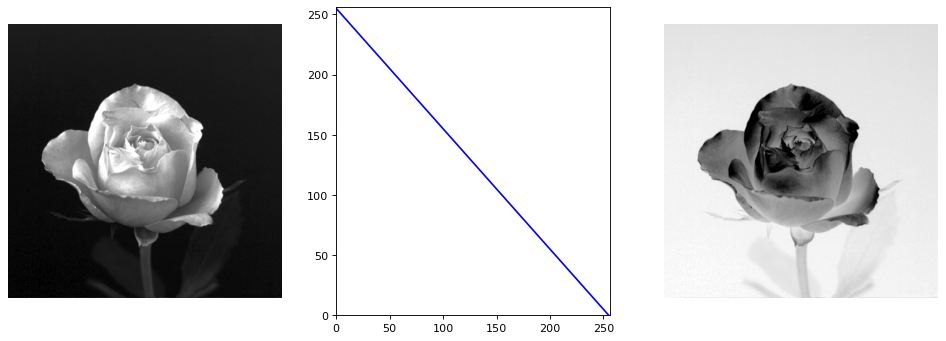

In [3]:
o = io.imread('rose.png')
lut = np.empty((256), np.uint8)
for i in range(256):
    lut[i] = int(255 - i)
pokazlut(o,lut);

> **Zadanie** obejrzyj negatywy obrazów `baboon.jpg` oraz `lotnicze.png`. Na wszystkich oglądanych obrazach, zwacaj uwagę na czytelność detali obrazu. Czy prezentacja obrazu w formie negatywu wpływa na czytelność elementów obrazów ?

In [4]:
# miejsce na kod


Jedynymi z podstawowych operacji typu punktowego są **operacje arytmetyczne**: dodawanie, odejmowanie, mnożenie i dzielenie przez ustaloną liczbę. Dla uproszczenia eksperymentów utworzymy na początek funkcję generującą tablice korekcji dla tego typu operacji.

In [5]:
# generowanie tablicy lut dla operacji arytmetycznych
def lut_arytm(ile,mnoznik):
    lut = np.empty((256), np.uint8)
    for i in range(256):
         lut[i] = np.clip(i*mnoznik + ile, 0, 255) 
    return lut

Przy jej pomocy obejrzeć wynik operacji arytmetycznej.

In [1]:
# operacje arytmetyczne z LUT
o = io.imread('baboon.jpg')
ile = 50
mnoznik = 1
pokazlut(o,lut_arytm(ile,mnoznik));
ile = 50
mnoznik = 0.25
pokazlut(o,lut_arytm(ile,mnoznik));

NameError: name 'io' is not defined

> **Zadanie** Poeksperymentuj z różnymi wartościami zmiennych `ile` (także ujemnymi) oraz `mnoznik` (także z zakresu 0...1). Jakie efekty można uzyskać przy pomocy operacji artymetycznych ? Jakie widzisz niedoskonałości tych operacji ?

> **Zadanie** Poeksperymentuj z opracjami arytmetycznymi na obrazach `rice.tif`, `rtg.tif`, `lotnicze.png`. Czy i w jaki sposób można poprawić jakość tych zdjęć ?

> **Zadanie** Jak dotychczas omówione operacje (negatyw, dodawanie, odejmowanie, mnozenie i dzielenie) wpływaja na histogram obrazu? Wykonaj stosowne eksperymenty, obejrzyj histogramy przed i po wykonaniu operacji. Do wyświetlenia obrazu wraz z jego histogramem możesz wykorzystać funkcję `pokazhist` 

In [7]:
# miejsce na kod


Korekcja **gamma**, pozwala na poprawe kontrastu obszarów jasnych kosztem ciemnych lub odwrotnie. Operacje te stosuje sie w sytuacji, gdy jasne obszary obrazu sa zbyt mało kontrastowe, zas ciemne nie odgrywaja wiekszej roli, lub odwrotnie. Na poczatek zostanie zdefiniowana funkcje generująca tablicę korekcji dla zadanego paramteru gamma. 

In [8]:
# tablica korekcji dla korekcji gamma
def lut_gamma(gamma): 
    lut = np.empty(256, np.uint8)
    for i in range(256):
        lut[i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    return lut

Dzięki niej możliwe jest wykonywania korekt obrazu opartych o korekcję gamma.

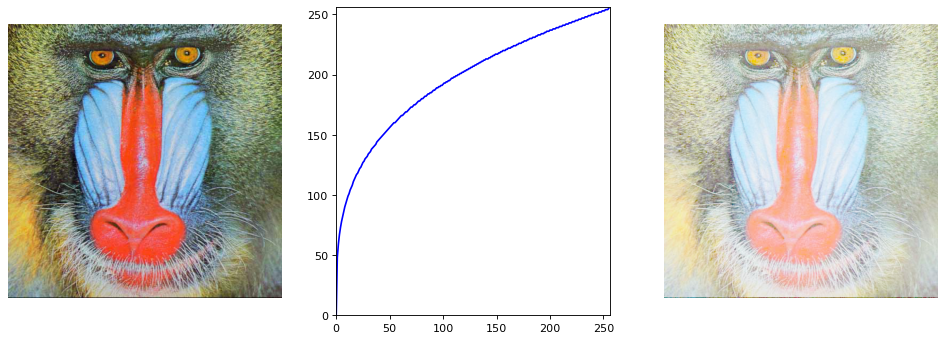

In [9]:
# korekcja gamma z LUT
o = io.imread('baboon.jpg')
gamma = 0.3
pokazlut(o,lut_gamma(gamma));

> **Zadanie** Poeksperymentuj z różnymi wartościami `gamma`. Porównaj rozjaśnianie i pociemnianie metoda koreksji gamma oraz operacjami arytmetycznymi.

> **Zadanie** Poeksperymentuj z opracjami arytmetycznymi na obrazach `rice.tif`, `rtg.tif`, `lotnicze.png`. Czy i w jaki sposób można poprawić jakość tych zdjęć korzystając z korekcji gamma ? Czym różnią się efekty korekcji gamma od wyników wcześniej przetestowanych operacji arytmetycznych.

Zdarza się, że obrazy mają zawężoną skalę jasności. Przykładowo, obraz może sprawiać wrazenie bladego przez to, ze brakuje w nim skrajnych odcieni szarosci – bliskich pełnej bieli i/lub czerni. W takim przypadku stosuje sie przekształcenie rozszerzajace skale odcieni szarosci wystepujacych w obrazie w ten sposób, by rozpoczynała sie od pełnej czerni (wartosc punktu = 0) az do pełnej bieli (wartośc punktu = 255). Operacja taka jest nazywana **rozciąganiem histogramu**. Takie
przekształcenie zwieksza kontrast obrazu przez zwiekszenie odstepów miedzy kolejnymi jasnosciami wystepujacymi w obrazie.

In [10]:
# tablica korekcji dla rozciągania histogramu
def lut_rozciagnij(wmin,wmax):
    lut = np.empty((256), np.uint8)
    for i in range(256):
        if i<wmin:
            lut[i] = 0
        elif i>wmax:
            lut[i] = 255
        else:
            lut[i] = int(float((i - wmin)*255)/float(wmax - wmin))
    return lut

min = 0  , max = 255


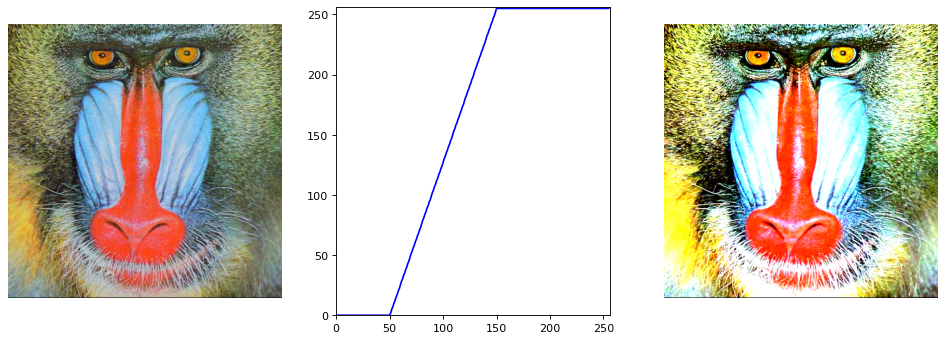

In [11]:
# rozciąganie histogramu z LUT
o = io.imread('baboon.jpg')
wmin = 50
wmax = 150
pokazlut(o,lut_rozciagnij(wmin,wmax));
print('min =',o.min()," , max =",o.max())

Rozciąganie histogramu umożliwia zwiększenie kontrastu obrazów o niskiej dynamice.

obraz oryginalny


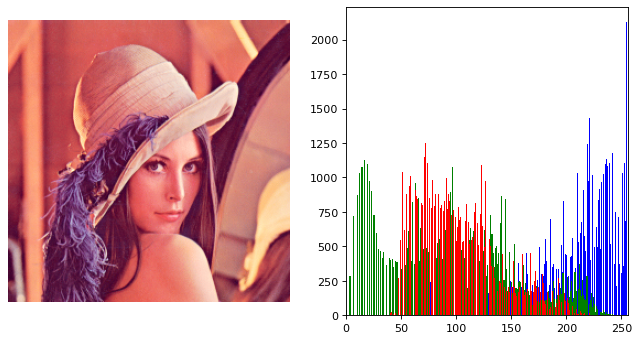

obraz o pogorszonej dynamice


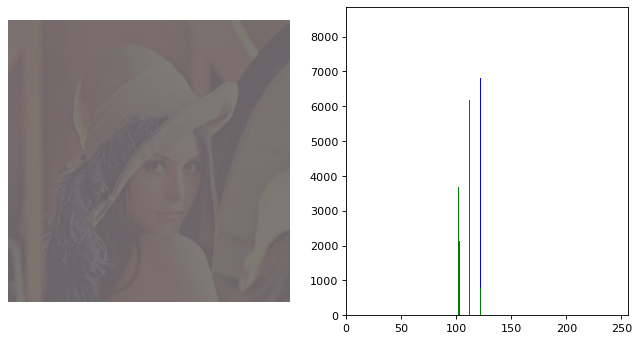

min= 100 max= 125
obraz skorygowany


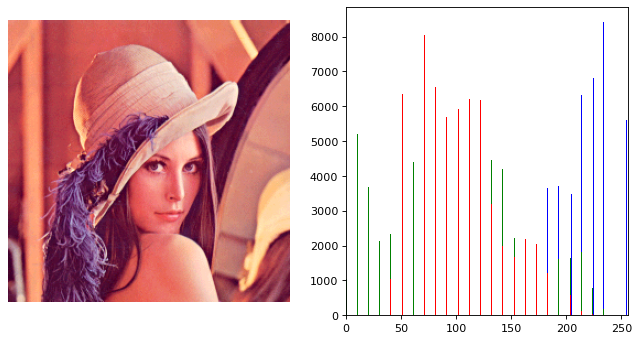

In [12]:
o = io.imread('lena.png')
#o = io.imread('baboon.jpg')
# obraz oryginalny
print("obraz oryginalny")
pokazhist(o)
# obraz o niskiej dynamice
print("obraz o pogorszonej dynamice")
lut1 = lut_arytm(100,0.1)
o2 = o.copy()
o2 = lut1[o]
pokazhist(o2)
print("min=",o2.min(),"max=",o2.max())
# rozciągnięcie histogramu
print("obraz skorygowany")
lut2 = lut_rozciagnij(o2.min(),o2.max())
o3 = o2.copy()
o3 = lut2[o2]
pokazhist(o3)

> **Pytanie** Czym różni się obraz skorygowany (powyżej) od oryginalnego obrazu `lena` ?

> **Zadanie** wykonaj rozciąganie histogramu na obrazach `tire.tif` i `lotnicze.png`. Oceń rezultaty

In [13]:
# miejsce na kod


**Progowanie jasności** jest najprostszą metoda konwersji obrazu skali szarości lub kolorowego w obraz binarny. Parametrem metody jest próg lub progi określające poziom jasności odcięcia. Mogą one być ustalane manualnie lub wyznaczane automatycznie.

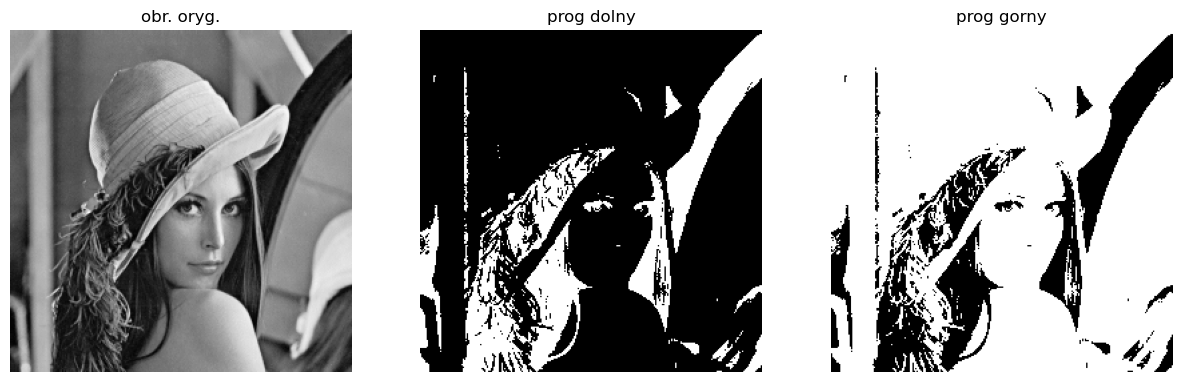

In [14]:
# progowanie obrazu w skali szarości
lena = sic.rgb2gray(io.imread('lena.png'))*255

prog = 66
liobr = []
lipod = []
liobr.append(lena)
lipod.append("obr. oryg.")
liobr.append(lena<prog)
lipod.append("prog dolny")
liobr.append(lena>prog)
lipod.append("prog gorny")
pliob(liobr,3,lipod)


> **Pytanie** Czym róznią się poszczególne wyniki progowania dla tych samych wartości progowych ?

> **Zadanie** Poeksperymentuj z różnymi wartościami progowymi. Wyświetl wyniki dla wybranego rodzaju wyniku progowania dla róznych progów w formie macierzy obrazów (tak jak w powyższym przykładzie).

> **Zadanie** wykonaj progowanie dla obrazów `kalkulator.png` oraz `rice.tif` dobierz próg tak, by na obrazie były widoczne obiekty na obrazie oryginalnym.

Najbardziej znaną metodą automatycznego doboru wartości progowej jest tzw. metoda Otsu, optymalizująca wartość progową korzystając z miar statystycznych.

prog Otsu:112.87980878906251


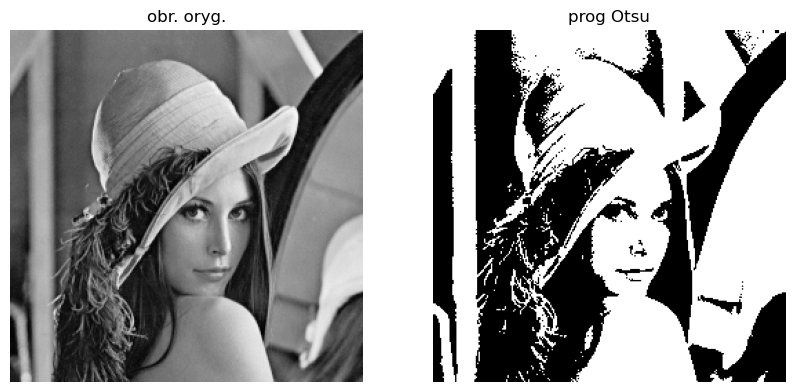

In [15]:
lena = sic.rgb2gray(io.imread('lena.png'))*255
prog = sif.threshold_otsu(lena)
print("prog Otsu:" + str(prog))
liobr = []
lipod = []
liobr.append(lena)
lipod.append("obr. oryg.")
liobr.append(lena>prog)
lipod.append("prog Otsu")
pliob(liobr,2,lipod)



> **Zadanie** Metody automatycznego doboru progu (w tym pokazana wyżej metoda Otsu) sprawdzają się najlepiej dla obrazów o histogramie bimodalnym. Obrazem takim jest obraz `dowels.png`. Powtórz powyższy przykład dla tego obrazu.

**Segmentacja koloru** wymaga nieco większej liczby parametrów. Obraz kolorowy składa się z trzech składowych. W modelu RGB składowe te określają intensywność trzech barw podstawowych czerwonej, zielonej i niebieskiej. Aby otrzymać poszczególne składowe, obraz kolorowy należy zdekomponować na trzy obrazy w skali szarości. Możliwa jest także operacja odwrotna - z trzech obrazów składowych koloru tworzony jest jeden obraz kolorowy.

Obraz kolorowy składa się z pikseli będących wektorami składowych koloru. W modelu RGB są to składowe czerwona, zielona i niebieska. Piksele w danym obrazie barwnym tworzą chmurę punktów w przestrzeni barw. Zdefiniowana poniżej, funkcja `kolory_rgb` pokazuje obraz kolorowy oraz chmurę punktów w przestrzeni RGB. 

In [16]:
def kolory_rgb(obr):
    r = obr[:,:,0]
    g = obr[:,:,1]
    b = obr[:,:,2]
    fig = plt.figure(figsize=(10,5), dpi= 80)
    plt.subplot(1,2,1)
    pokaz(obr)  
    axis = fig.add_subplot(1,2, 2, projection="3d")
    kolory_pikseli = obr.reshape((np.shape(obr)[0]*np.shape(obr)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(kolory_pikseli)
    kolory_pikseli = norm(kolory_pikseli).tolist()
    axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=kolory_pikseli, marker=".")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.show()
    

Przykład poniżej prezentuje przykładową chmurę punktów koloru dla prostego obrazu.

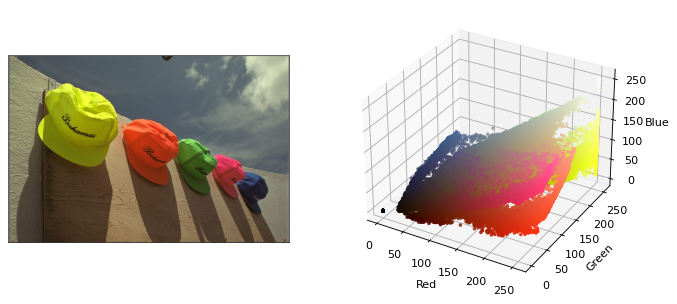

In [17]:
obr = io.imread('kodim03.png')
kolory_rgb(obr)


> **Zadanie** zobacz jak wyglądają chmury punktów dla innych obrazów kolorowych znajdujących się w katalogu roboczym

Segmentacja obrazu kolorowego przez progowanie wymaga podania zakresu kolorów, dla którym w docelowym obrazie binarnym zostaną przypisane wartości 1.  

In [18]:
def segmkol(obr, prog_dol, prog_gora):
    # funkcja proguje trzy składowe koloru
    maska = (obr[:,:,0] > prog_dol[0]) & (obr[:,:,0] < prog_gora[0])
    maska = maska & (obr[:,:,1] > prog_dol[1]) & (obr[:,:,1] < prog_gora[1])
    maska = maska & (obr[:,:,2] > prog_dol[2]) & (obr[:,:,2] < prog_gora[2])
    return maska        

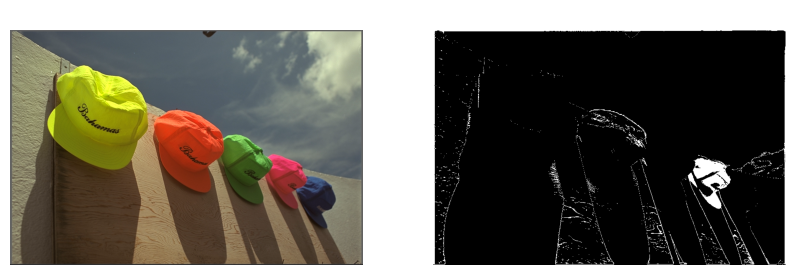

In [19]:
obr = io.imread('kodim03.png')

dol = (90,0,40)
gora = (255,100,255)
bin = segmkol(obr, dol, gora)
pliob([obr,bin],2)

> **Zadanie** Poeksperymentuj z innymi zakresami i innymi obrazami, spróbuje wyodrębnić z obrazów dobrze rozróżnialne obiekty. 

> **Zadanie** Wykonaj podobne eksperymenty ale wybierając zakresy w innych przestrzeniach kolorów.

In [20]:
# miejsce na kod


# 3. Filtry kontekstowe

W filtrach **kontekstowych liniowych**, odpowiedź filtra jest kombinacją liniową punktów należących do otoczenia oraz współczynników maski.

Działanie **filtrów dolnoprzepustowych** polega na usuwaniu z obrazu punktów o wysokiej częstotliwości tj. znacząco różniących się od swojego otoczenia. Filtry te z jednej strony usuwają szum z obrazu, zaś z drugiej wprowadzają jego rozmycie.

Najpowszechniej stosowanym filtrem rozmywającym jest filtr Gaussa, dla którego wartości elementów maski odpowiadają wartościom rozkładu normalnego z maksimum znajdującym się w punkcie centralnym.

C:\Users\iwano\AppData\Local\Temp\ipykernel_12136\2824430343.py:7: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  liobr.append(sif.gaussian(obr,sigma,multichannel = True))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


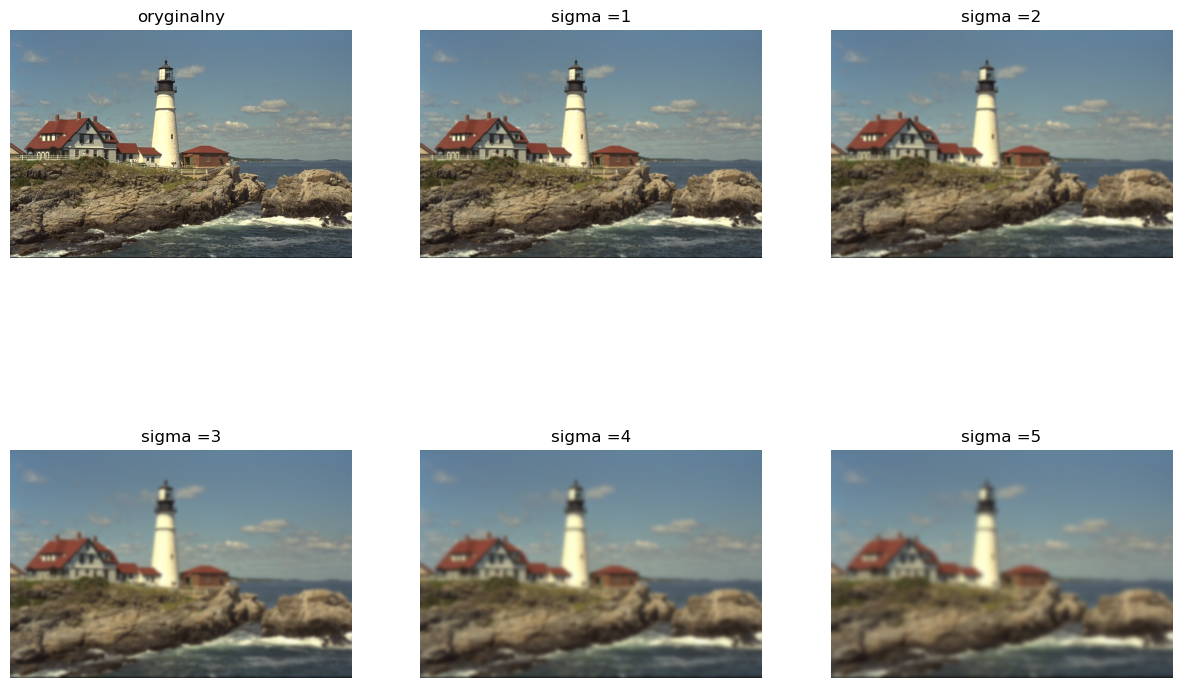

In [21]:
# rozmmycie Gausowskie
obr = io.imread('kodim21.png')

liobr = [obr]
lipod = ['oryginalny']
for sigma in range(1,6):
    liobr.append(sif.gaussian(obr,sigma,multichannel = True))
    lipod.append("sigma =" + str(sigma))
pliob(liobr,3,lipod)    

> **Zadanie** Co oznacza paramter 'sigma' i jak wpływa on na wynik filtracji ? 

**Filtry górnoprzepustowe** usuwają z obrazu obszary charakteryzujące się łagodnymi zmianami jasności - odpowiadające harmonicznym sygnału o niskich częstotliwościach. Pozostawiają na obrazie jednocześnie obszary odpowiadające harmonicznym o wysokich częstotliwościach. Są wykorzystywane do wykkrywanie krawędzi.

Filtry Sobela jest wykorzystywany do wykrywania krawędzi w obrazie.

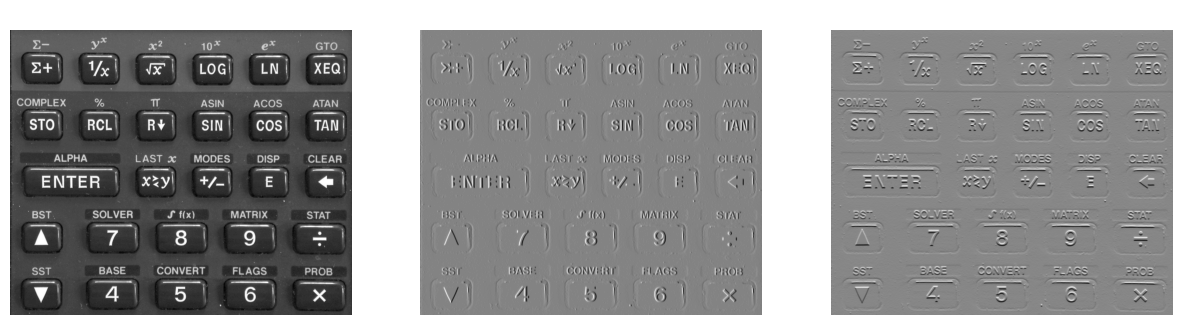

In [22]:
obr = io.imread('kalkulator.png')
obr = obr[:,:,1]
sobely = sif.sobel(obr,axis=0)
sobelx = sif.sobel(obr,axis=1)
pliob([obr,sobelx,sobely],3)

> **Pytanie** Jakiem wartościom obrazu wyjściowego odpowiada szarość charakteryzująca większą część obrazu ?

> **Zadanie** Czym różnią się poszczególne warianty filtra ?

Oba rodzaje gradientu są na ogół w jedną funkcję amplitudy gradientu, co może być wykonane w jeden z dwóch sposobów.

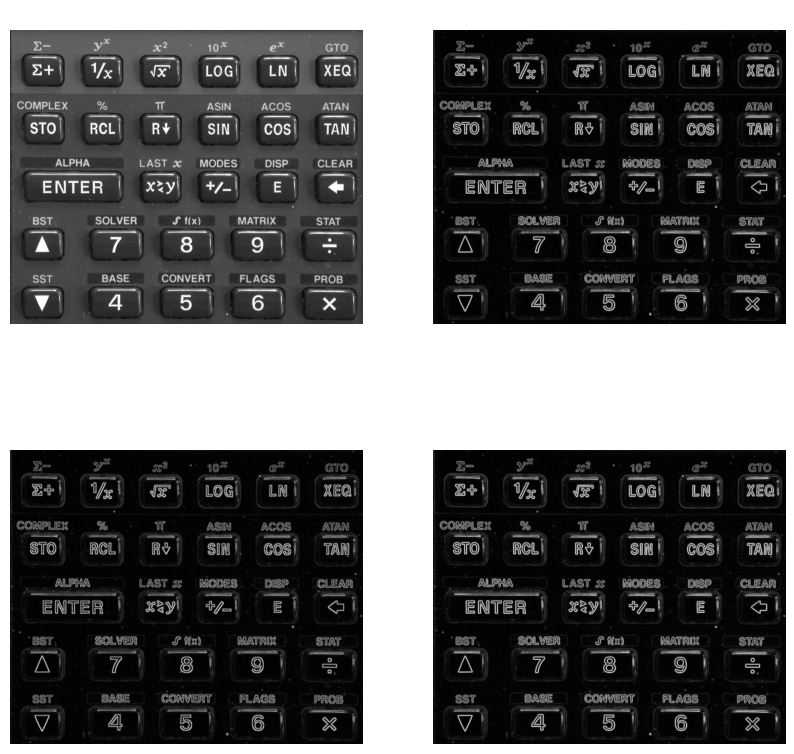

In [23]:
obr = io.imread('kalkulator.png')
obr = obr[:,:,1]
sobely = sif.sobel(obr,axis=0)
sobelx = sif.sobel(obr,axis=1)
sobel = sif.sobel(obr)
pliob([obr, sobel, abs(sobelx) + abs(sobely), np.sqrt(sobelx*sobelx + sobely*sobely)],2)

Oprócz istotnych krawędzi, omawiane filtry wykrywają także wszelki szum znajdujący się w obrazie. Pokazuej to poniższy przykład.

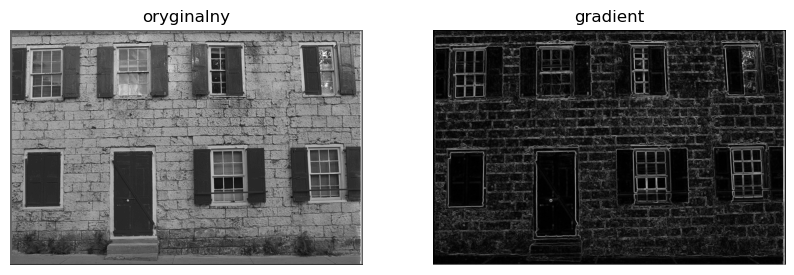

In [24]:
obr = io.imread('kodim01.png')
obr = obr[:,:,1]
sobel = sif.sobel(obr)
pliob([obr,sobel],2,['oryginalny','gradient'])

Dlatego często stosowaną kombinacją filtrów jest połączenie filtracji dolnoprzepustowej w celu redukcji szumu, z górnoprzepustową pozwalającą na wykrycie krawędzi. 

C:\Users\iwano\AppData\Local\Temp\ipykernel_12136\2380373410.py:4: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  obr2 = sif.gaussian(obr,rozmycie,multichannel=False)


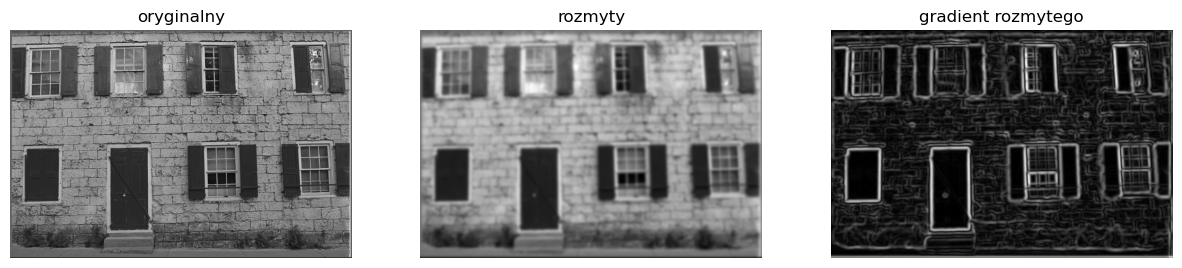

In [25]:
obr = io.imread('kodim01.png')
obr = obr[:,:,1]
rozmycie = 3
obr2 = sif.gaussian(obr,rozmycie,multichannel=False)
gradient = sif.sobel(obr2)
pliob([obr,obr2,gradient],3,['oryginalny','rozmyty','gradient rozmytego'])

> **Zadanie** Zbadaj, jak stopień rozmycia obrazu wpływa na efekt detekcji krawędzi.

Laplasjan jest estymatorem drugiej pochodnej. Poniższy przykład pokazuje porównanie Laplacjanu z filtrami Sobela. 

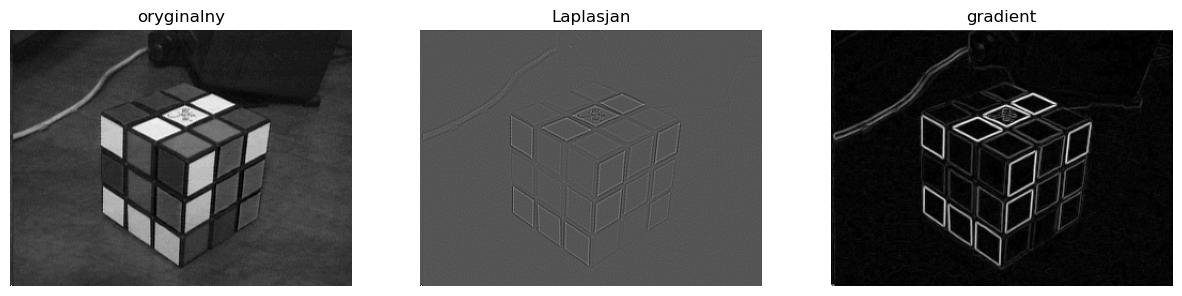

In [26]:
obr = io.imread('kostka.bmp')
obr = obr[:,:,1]
laplacian = sif.laplace(obr)
gradient = sif.sobel(obr)
pliob([obr,laplacian,gradient],3,['oryginalny','Laplasjan','gradient'])

> **Pytanie** Co wykrywa Laplasjan, a co filtr Sobela ?

W **filtrze medianowym** wyjściowa wartość punktu jest obliczana jako mediana wartosci punktów sasiedztwa. Dla dowolnego zbioru liczb mediane definiujemy jako wartosc srodkowa wyznaczona po uprzednim uporzadkowaniu rosnaco (lub malejaco) tego zbioru. Filtr medianowy zatem nie jest filtrem liniowym tj. wartosc punktu na obrazie wyjsciowym nie jest liniowo zalezna od wartosci punktów na obrazie wejsciowym. 

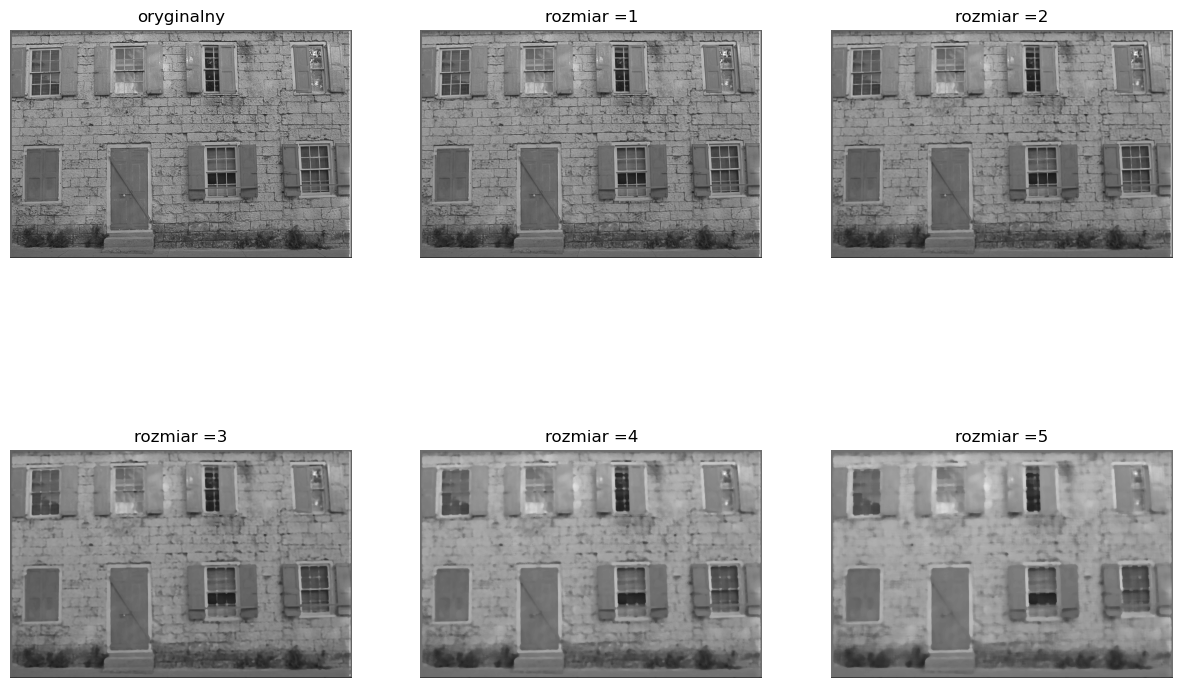

In [27]:
obr = io.imread('kodim01.png')
obr = obr[:,:,0]
liobr = [obr]
lipod = ['oryginalny']
for i in range(1,6):
    liobr.append(sif.median(obr,simo.disk(i)))
    lipod.append("rozmiar =" + str(i))
pliob(liobr,3,lipod)    

> **Pytanie** Jak efekt filtracji zalezy od wielkości maski ?

> **Zadanie** Dodaj do obrazu szum typu ''sól i pieprz'' (sprawdź w internecie jak to zrobić), a następnie porównaj działanie filtra medianowego i uśredniającego. 

> **Zadanie** Porównaj działanie filtrów medianowego i uśredniającego o takich samych rozmiarach masek. 

Do rodziny operatorów kontekstowych nieliniowych należą także operatory morfologiczne. Kluczową rolę w obu tych operacjach odgrywa forma sąsiedztwa definiowanego z wykorzystaniem **elementu strukturującego**. Dostępne w pakiecie `scikit-image` elementy strukturujące pokazane są w przykładzie poniżej.

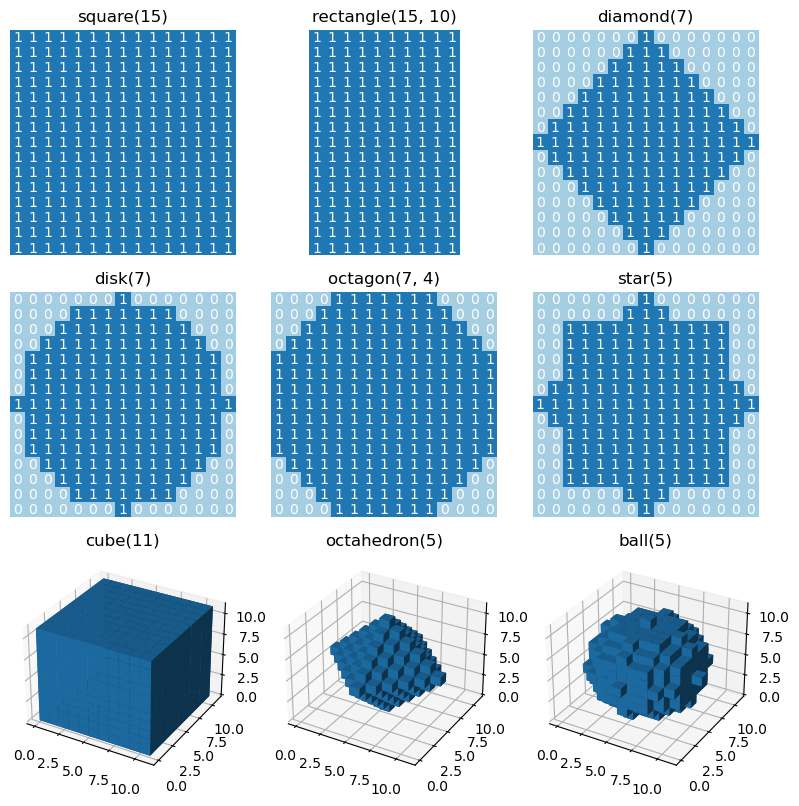

In [28]:

# Generate 2D and 3D structuring elements.
struc_2d = {
    "square(15)": simo.square(15),
    "rectangle(15, 10)": simo.rectangle(15, 10),
    "diamond(7)": simo.diamond(7),
    "disk(7)": simo.disk(7),
    "octagon(7, 4)": simo.octagon(7, 4),
    "star(5)": simo.star(5)
}

struc_3d = {
    "cube(11)": simo.cube(11),
    "octahedron(5)": simo.octahedron(5),
    "ball(5)": simo.ball(5)
}

# Visualize the elements.
fig = plt.figure(figsize=(8, 8))

idx = 1
for title, struc in struc_2d.items():
    ax = fig.add_subplot(3, 3, idx)
    ax.imshow(struc, cmap="Paired", vmin=0, vmax=12)
    for i in range(struc.shape[0]):
        for j in range(struc.shape[1]):
            ax.text(j, i, struc[i, j], ha="center", va="center", color="w")
    ax.set_axis_off()
    ax.set_title(title)
    idx += 1

for title, struc in struc_3d.items():
    ax = fig.add_subplot(3, 3, idx, projection=Axes3D.name)
    ax.voxels(struc)
    ax.set_title(title)
    idx += 1

fig.tight_layout()
plt.show()

Operatory morfologiczne **erozja** i **dylacja** (lub **dylatacja**) przypisują pikeslowi obrazu wyjściowego wartość najmniejszą lub największą spośród pikseli sąsiedztwa (opisanego przez element strukturujący). 

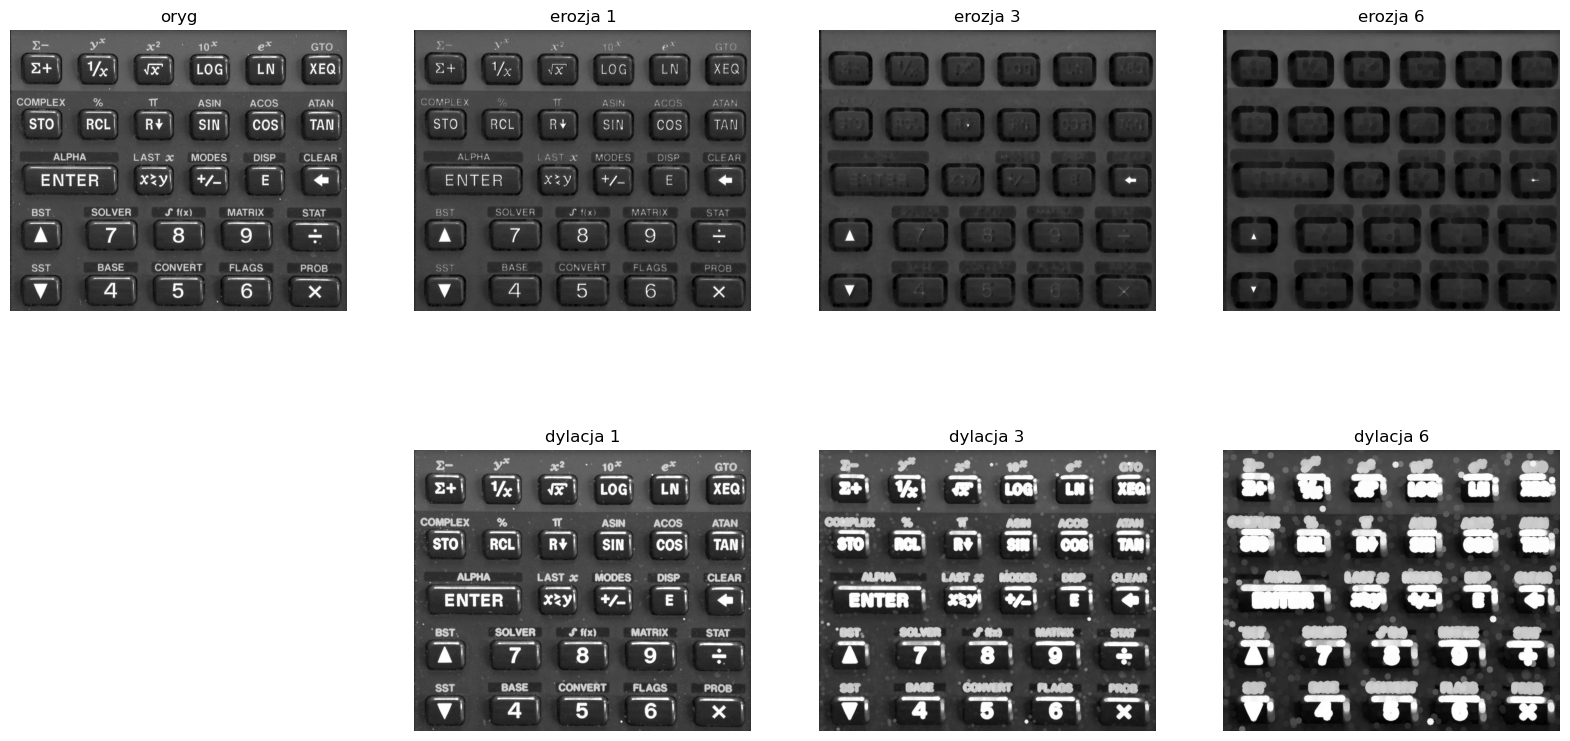

In [29]:
obr = io.imread('kalkulator.png')
obr = obr[:,:,1]
lio = [obr]
lin = ['oryg']
rozmiary = [1, 3, 6]
# erozje
for i in range(0,3):
    lio.append(simo.erosion(obr,simo.disk(rozmiary[i])))
    lin.append('erozja '+str(rozmiary[i]))
lio.append('')
lin.append('')
# dylacje
for i in range(0,3):
    lio.append(simo.dilation(obr,simo.disk(rozmiary[i])))
    lin.append('dylacja '+str(rozmiary[i]))
pliob(lio,4,lin)

> **Zadanie** Poeksperymentuj z innymi elementami strukturującymi. 

> **Pytanie** Jak wielkość elementu strukturującego iteracji wpływa na wynik operacji ? 

Kolejno wykonując erozję, a następnie na wyniku - **dylację** otrzymujemy filtr **otwarcia**. Wykonując operacje w odwrotnej kolejności otrzymamy filtr typu **zamknięcie**. Pierwszy z nich usuwa szum typu ''sól'', drugi - typu ''pieprz''. Filtry otwarcia i zamknięcia są wykorzystywane do usuwania elementów jaśniejszych i ciemniejszych od tła.

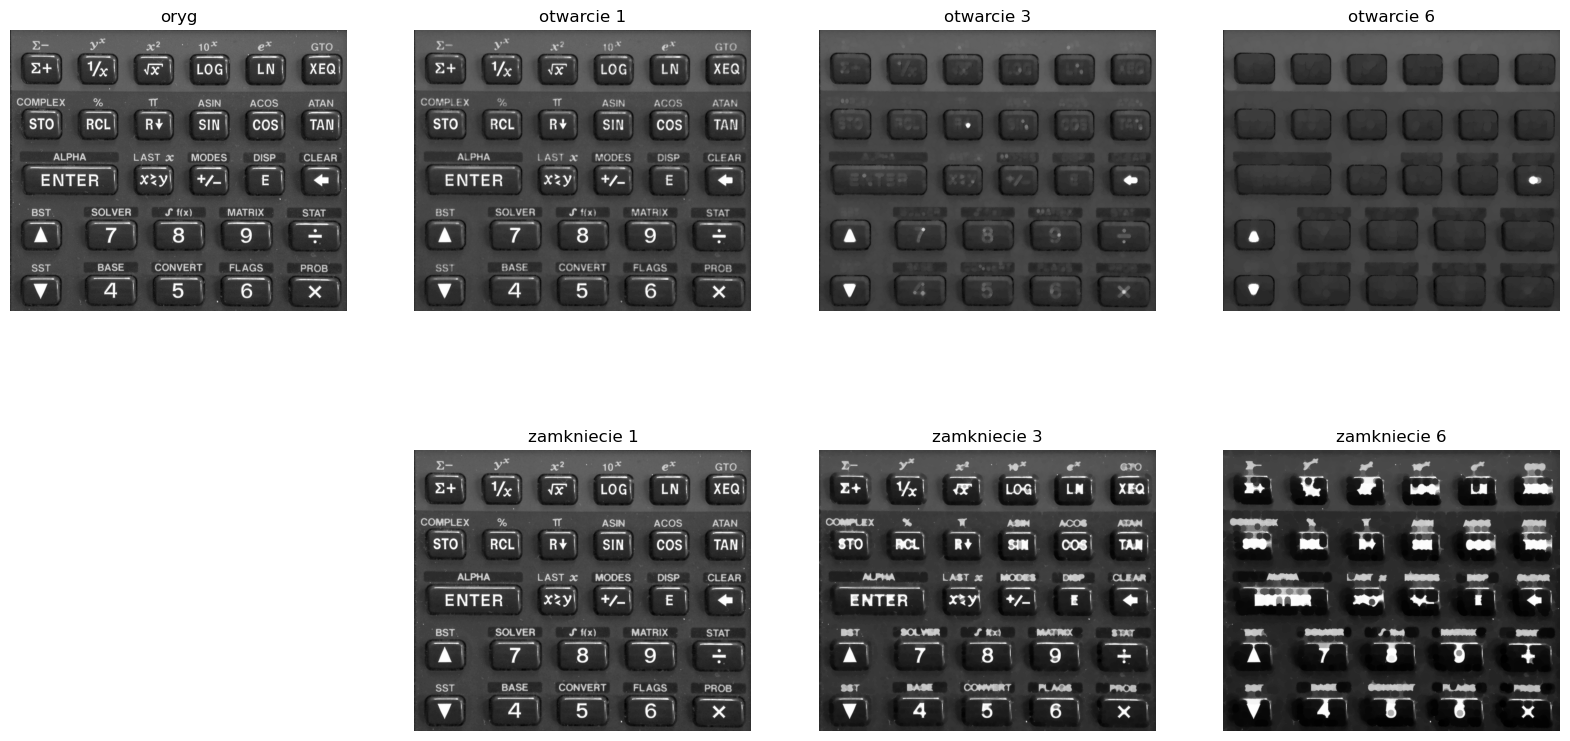

In [30]:
obr = io.imread('kalkulator.png')
obr = obr[:,:,1]
lio = [obr]
lin = ['oryg']
rozmiary = [1, 3, 6]
# erozje
for i in range(0,3):
    lio.append(simo.opening(obr,simo.disk(rozmiary[i])))
    lin.append('otwarcie '+str(rozmiary[i]))
lio.append('')
lin.append('')
# dylacje
for i in range(0,3):
    lio.append(simo.closing(obr,simo.disk(rozmiary[i])))
    lin.append('zamkniecie '+str(rozmiary[i]))
pliob(lio,4,lin)

Kolejny przykład pokazuje jedno z typowych zastosowań tego typu filtrów - do filtracji maski, która została wyodrębniona w efekcie segmentacji przez progowanie. Maska obejmuje obszar obrazu oryginalnego o charakterstycznym kolorze oraz pojedyncze piksele jasne poza tym obszarem oraz ciemne wewnątrz. Dzięki filtracji morfologicznej, piksele te są usuwane.  

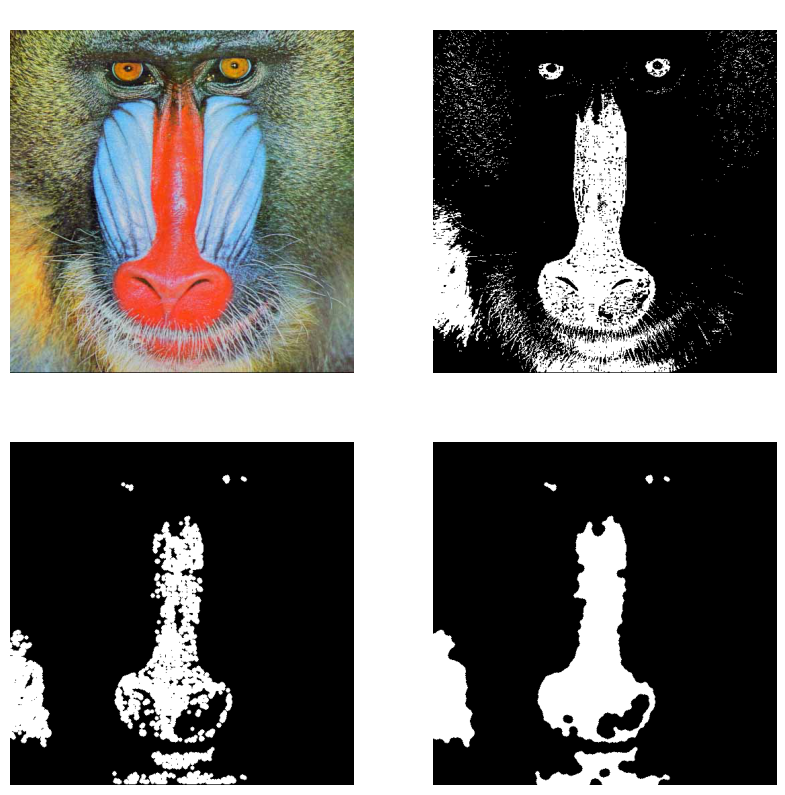

In [31]:
obr = io.imread('baboon.jpg')
dol = (180,0,0)
gora = (250,200,200)
bin = segmkol(obr, dol, gora)
binfilt1 = simo.opening(bin,simo.disk(3))
binfilt2 = simo.closing(binfilt1,simo.disk(6))
pliob([obr,bin,binfilt1,binfilt2],2)

> **Zadanie** Poeksperymentuj w powyższym przykładzie z różnymi wartościami parametrów - zarówno segmentacji koloru jak i elementów strukturujących otwarcia i zamknięcia.

# 4. Cechy obrazów

Etykietowanie obrazu binarnego polega na takim jego przetworzeniu w ten sposób, by w rezultacie każdy obiekt binarny został oznaczony unikalną etykietą, tj. aby wszystkie piksele znajdujące się w jego obrębie posiadały taką samą wartość równą tej etykiecie. Etykiety mogą zostać wyświetlone jako odcienie szarości, albo jako różniące się od siebie, losowe kolory

(257, 257)


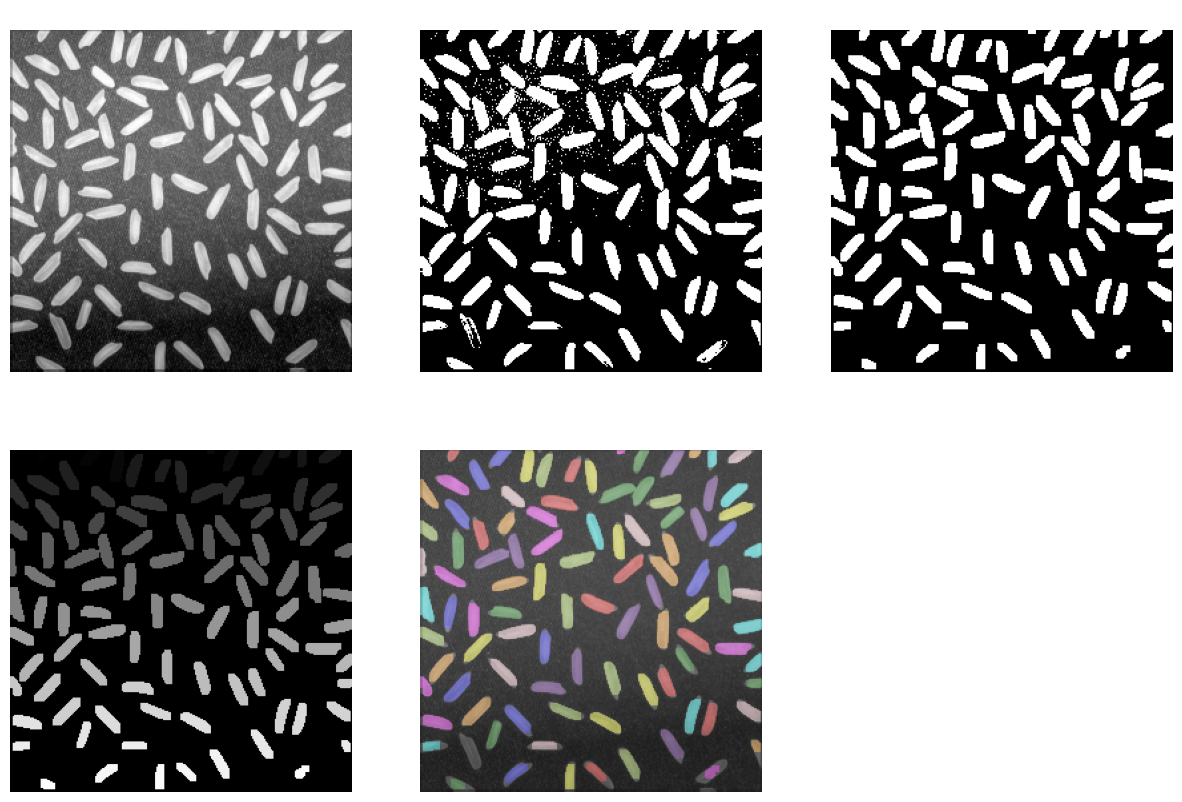

In [38]:
# wczytanie obrazu
obraz = io.imread('rice.tif',0)
# binaryzacja
binarny = (obraz > 120) 
# filtracja morfologiczna, filtr otwarcia
otwarcie = simo.opening(binarny,simo.square(5))
print(binarny.shape)
#etykietowanie
etykiety = sime.label(otwarcie)
# wyswietlanie
pliob([obraz, binarny, otwarcie, etykiety, sic.label2rgb(etykiety, image=obraz, bg_label=0)],3)

Po wykonaniu etykietowania, możliwy jest łatwy dostęp do kazdego obiektu.

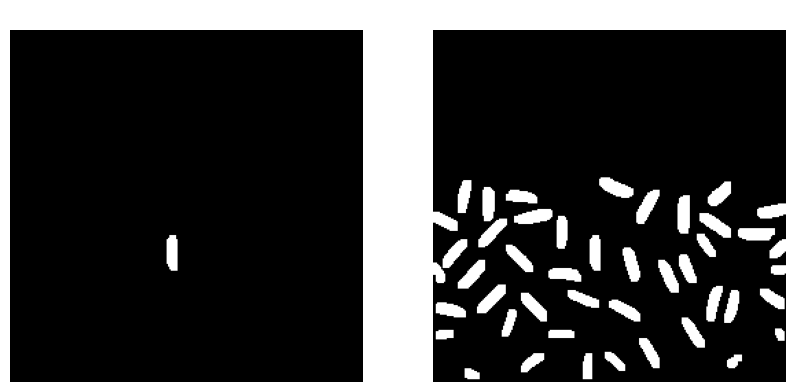

In [32]:
# obiekt o indeksie 34  i o etykietach większych niż 50
pliob([etykiety == 66,np.where(etykiety>50,255,0)],2)

> **Zadanie** Wykonaj etykietowanie obrazu `obiekty.png` (zamienionego na obraz binarny zawierający wszystkie widoczne obiekty) oraz `dowels.png`. W każdym przypadku wykonaj stosowne przetwarzanie wstępne.

In [40]:
obraz = io.imread('dowels.png',0)
binarny = (obraz >120)[:,:,1]
print(binarny.shape)
otwarcie = simo.opening(binarny, simo.square(5))

(266, 338)


Obraz po etykietowaniu zawiera rozróżnialne obiekty, które mogą być dalej przetwarzane. Najczęściej przetwarzanie to polega na wyznaczeniu dla każdego obiektu cech, dzięki którym możliwe jest rozróżnienie obiektów należących do różnych klas. Do wyznaczania opisu obiektów na obrazie etykietowanym wykorzystuje się instrukcję `regionprops`.


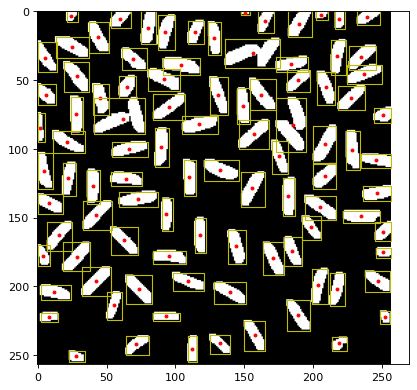

In [33]:
# środek ciężkości (centroid) i najmniejszy prostoką (bounding box)
obraz = io.imread('rice.tif',0)
binarny = obraz > 120
otwarcie = simo.opening(binarny,simo.square(5))
etykiety = sime.label(otwarcie)
cechy = sime.regionprops(etykiety)
plt.figure(figsize=(6,6), dpi = 80)
plt.imshow(otwarcie, cmap=plt.cm.gray)
for obiekt in cechy:
    y0, x0 = obiekt.centroid
    plt.plot(x0, y0, '.r', markersize=5)
    minr, minc, maxr, maxc = obiekt.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    plt.plot(bx, by, '-y', linewidth=1)
plt.show()

(array([ 1.,  0.,  0.,  1.,  2.,  0.,  3.,  1.,  2.,  1.,  2.,  3.,  3.,
         4.,  2.,  0.,  3.,  5.,  5.,  9., 11.,  7., 10.,  5.,  5.,  5.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([ 18.  ,  26.48,  34.96,  43.44,  51.92,  60.4 ,  68.88,  77.36,
         85.84,  94.32, 102.8 , 111.28, 119.76, 128.24, 136.72, 145.2 ,
        153.68, 162.16, 170.64, 179.12, 187.6 , 196.08, 204.56, 213.04,
        221.52, 230.  , 238.48, 246.96, 255.44, 263.92, 272.4 , 280.88,
        289.36, 297.84, 306.32, 314.8 , 323.28, 331.76, 340.24, 348.72,
        357.2 , 365.68, 374.16, 382.64, 391.12, 399.6 , 408.08, 416.56,
        425.04, 433.52, 442.  ]),
 <BarContainer object of 50 artists>)

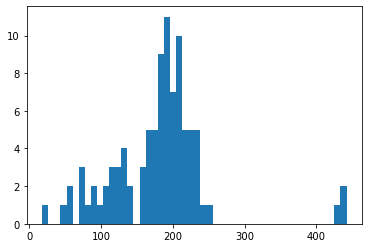

In [27]:
# histogram rozmiarów
rozmiary = np.zeros(len(cechy))
for i in range(0,len(cechy)):
    rozmiary[i] = cechy[i]['area']
plt.hist(rozmiary,50)

> **Zadanie** Sprawdź jaki inne cechy można otrzymać korzystając z komendy `regionprops`, wykorzystaj je, eksperymentując z obrazem `dowels.png`

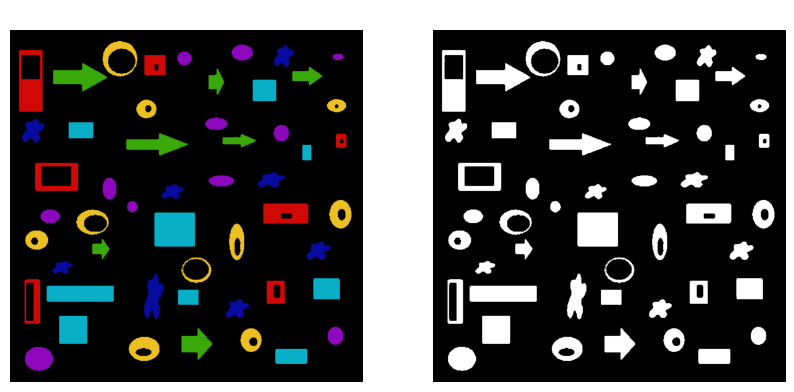

In [44]:
# wczytanie obrazu
o = io.imread("obiekty.png")
b = o[:,:,1]>0
pliob([o,b],2)

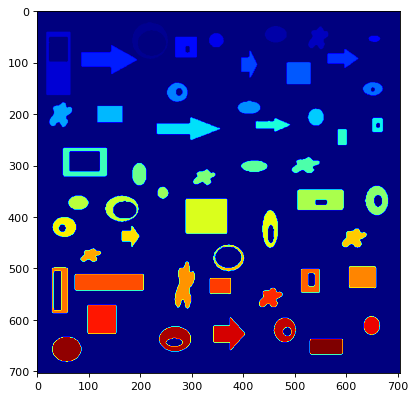

In [45]:
# etykietowanie
etykiety = sime.label(b)
plt.figure(figsize=(6,6), dpi = 80)
plt.imshow(etykiety,'jet')

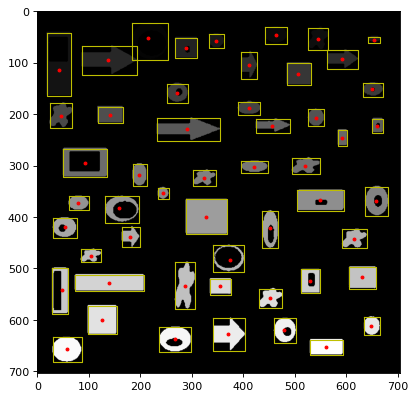

In [46]:
cechy = sime.regionprops(etykiety)
plt.figure(figsize=(6,6), dpi = 80)
plt.imshow(etykiety, cmap=plt.cm.gray)
for obiekt in cechy:
    y0, x0 = obiekt.centroid
    plt.plot(x0, y0, '.r', markersize=5)
    minr, minc, maxr, maxc = obiekt.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    plt.plot(bx, by, '-y', linewidth=1)

Poniższy kod pokazuje jak wybrane cechy można umieścić w tablicy cech, w której poszczególne wiersze odpowiadają obiektom (numer wiersz = etykieta), zaś kolumny - atrybuttom (cechom). W ostatniej kolumnie zostanie umieszczony indeks klasy (określony na podstawie koloru obiektu na obrazie oryginalnym)

In [47]:
# ekstrakcja cech
# wyszukiwanie kolorów
kolory = np.unique(o.reshape(-1, o.shape[2]), axis=0) # kolory w obrazie
kolory = kolory[1:7,:] # usuwa kolor tła
print(kolory)
      #   [[160,11,8], # granatowy
      #    [9,168,57], # zielony
      #    [6,9,209], # czerwony
      #    [198,175,8], # niebieski
      #    [189,8,141], # fioletowy
      #    [34,191,236]] # żółty
ile_obiektow = len(cechy)
ile_kategorii = len(kolory)
lista_cech = ['EulerNumber','Area','BoundingBoxArea','FilledArea','Extent','EquivDiameter','Solidity']
ile_cech = len(lista_cech)
tabela_cech = np.zeros((ile_obiektow,ile_cech+1))
tabela_cech[0,:] = np.nan #np.ones((1,ile_cech +1))*-99 # cechy nieistniejącego obiektu o etykiecie "0"
for i in range(0,ile_obiektow):
    for j in range(0,ile_cech):
      #  tabela_cech[i+1,j] = cechy[i][lista_cech[j]]
      tabela_cech[i,j] = cechy[i][lista_cech[j]]
    x,y = cechy[i]['Coordinates'][1] # wsp. jednego z punktów obiektu - do próbkowania koloru
    for k in range(0,ile_kategorii):
        if list(o[x,y,:]) == list(kolory[k,:]):
            break;
    tabela_cech[i,-1] = k
tabela_cech[1:,0] = (tabela_cech[1:,0] == 1) # korekta liczby Eulera
print(tabela_cech[1,:])

[[  8  11 160 255]
 [  8 175 198 255]
 [ 57 168   9 255]
 [141   8 189 255]
 [209   9   6 255]
 [236 191  34 255]]
[1.00000000e+00 1.05000000e+03 1.34400000e+03 1.05000000e+03
 7.81250000e-01 3.65636640e+01 9.72222222e-01 3.00000000e+00]


Cechy pierwszych pięciu obiektów.

In [48]:
tabela_cech[0:5,:] # pierwszy wiersz

array([[-3.00000000e+00,  1.70500000e+03,  4.97000000e+03,
         3.81900000e+03,  3.43058350e-01,  4.65926327e+01,
         4.35838446e-01,  5.00000000e+00],
       [ 1.00000000e+00,  1.05000000e+03,  1.34400000e+03,
         1.05000000e+03,  7.81250000e-01,  3.65636640e+01,
         9.72222222e-01,  3.00000000e+00],
       [ 1.00000000e+00,  1.04100000e+03,  1.71600000e+03,
         1.04100000e+03,  6.06643357e-01,  3.64066253e+01,
         8.27503975e-01,  0.00000000e+00],
       [ 0.00000000e+00,  4.00800000e+03,  5.78100000e+03,
         5.77700000e+03,  6.93305656e-01,  7.14362940e+01,
         6.93785702e-01,  4.00000000e+00],
       [ 1.00000000e+00,  6.09000000e+02,  7.56000000e+02,
         6.09000000e+02,  8.05555556e-01,  2.78460569e+01,
         9.79099678e-01,  3.00000000e+00]])

Przetwarzając tablicę `tabela_cech` możemy uzyskać dokonać selekcji obiektów pod względem wartości wybranej cechy/cech.

In [49]:
# wybór obiektów należących do okreslonej klasy (ostatni atrybut)
# True 0 oznacza, że obiekt na odpowiedniej pozycji nalezy do ustalonej klasy, False - nie należy 
print(tabela_cech[:,-1]==2)
print(np.where(tabela_cech[:,-1]==2) + np.array(1)) # uwaga: + 1 bo obiekt o indeksie n ma etykietę n+1

[False False False False False False False  True  True  True False False
 False False False False False  True False  True False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False  True
 False False False False]
[[ 8  9 10 18 20 35 48]]


In [50]:
# wskazanie na obiekty o powierzchni poniżej 2000 pikseli
tabela_cech[:,1] < 2000

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False,  True])

In [51]:
# etykiety takich obiektów
mniejsze_niz_2000 = np.where(tabela_cech[:,1] < 2000)
print(mniejsze_niz_2000)

(array([ 0,  1,  2,  4,  5,  6,  8,  9, 11, 12, 13, 14, 15, 16, 18, 19, 20,
       22, 23, 24, 25, 26, 27, 29, 30, 32, 33, 34, 35, 36, 37, 40, 41, 43,
       44, 46, 48, 49, 51], dtype=int64),)


In [52]:
# czy obiekt o etykiecie 1 ma powierzchnię mniejsza niż 2000 pikseli ?
print(np.isin(1,mniejsze_niz_2000))
# a obiekt o etykiecie 4 ?
print(np.isin(4,mniejsze_niz_2000))

True
True


Dzięki powyższym metodom selekcji możemy wyświetlić obraz zwierający obiekty spełniające określone warunki

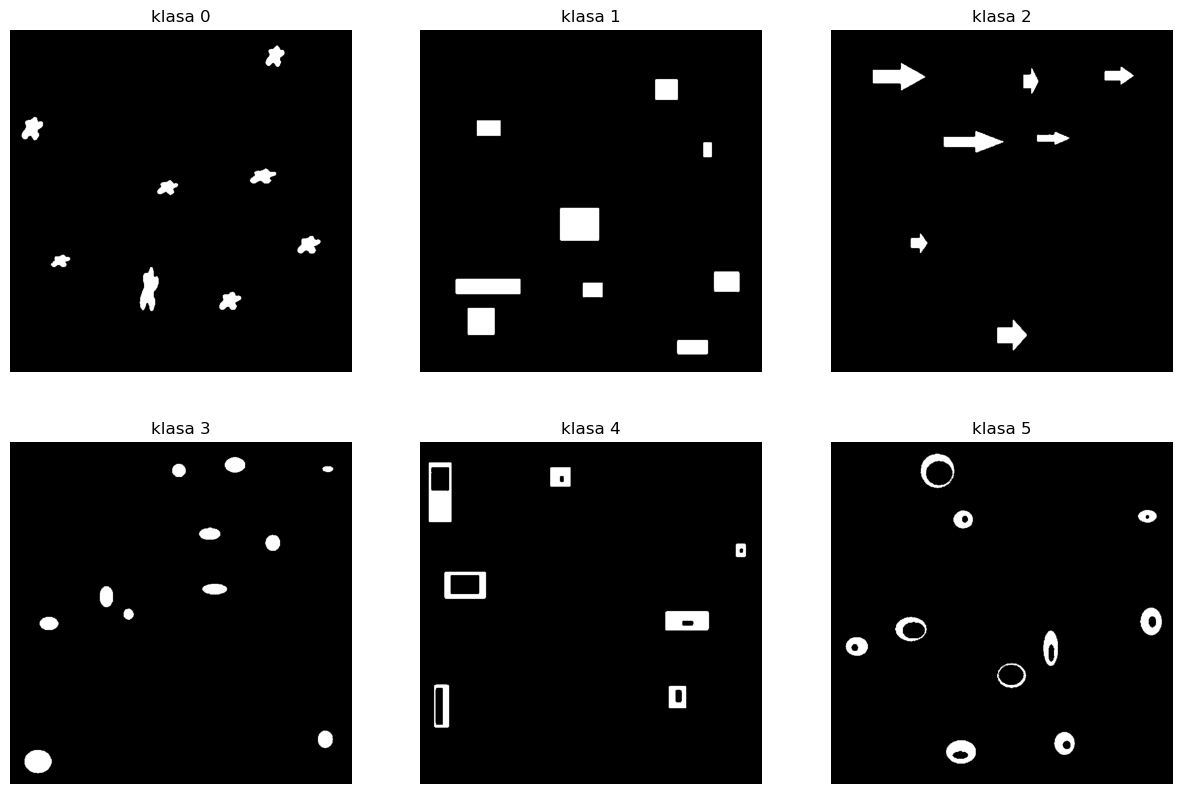

In [53]:
# warunek na klasę
lio = []
lin = []
for numer_klasy in range(6):
    lio.append(np.where(np.isin(etykiety,np.where(tabela_cech[:,-1] == numer_klasy)+ np.array(1)),255,0))
    lin.append('klasa ' + str(numer_klasy))
pliob(lio,  3, lin)    

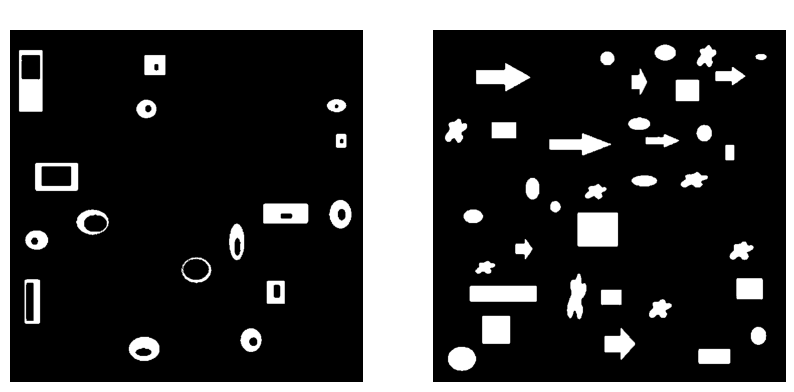

In [55]:
# atrybut 0 - liczba Eulera

euler_0 = np.where(tabela_cech[:,0] == 0) + np.array(1) # 0 - z otworami
euler_1 = np.where(tabela_cech[:,0] == 1) + np.array(1) # 1 - bez otworów
otwory = [np.where(np.isin(etykiety,euler_0),255,0),np.where(np.isin(etykiety,euler_1),255,0)]
pliob(otwory,2)

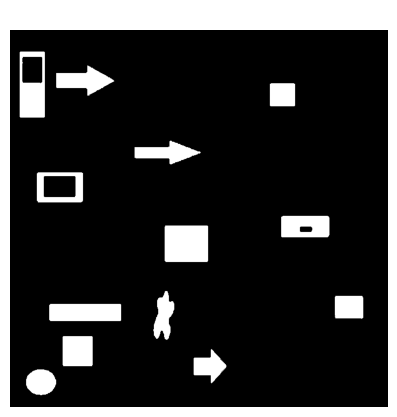

In [58]:
# atrybut 1 - powierzchnia
pliob([np.where(np.isin(etykiety,np.where(tabela_cech[:,1] > 2000) + np.array(1)),255,0)])

> **Zadanie** poeksperymentuj z innymi cechami

Konwersja do innej postaci danych: dotychczas - macierz numpy, nowa - ramka danych (pakiet pandas). nowa postać danych potrzebna do wyświetlenia macierzy wykresów punktowych.

In [59]:
inna_tabela = pd.DataFrame(tabela_cech)
inna_tabela.head()

0       1       2       3    4     5    6    7
0 -3.00 1705.00 4970.00 3819.00 0.34 46.59 0.44 5.00
1  1.00 1050.00 1344.00 1050.00 0.78 36.56 0.97 3.00
2  1.00 1041.00 1716.00 1041.00 0.61 36.41 0.83 0.00
3  0.00 4008.00 5781.00 5777.00 0.69 71.44 0.69 4.00
4  1.00  609.00  756.00  609.00 0.81 27.85 0.98 3.00

Na bazie istniejących cech możemy tworzyć nowe. Reprezentacja w postaci ramki danych pozwala na przypisanie każdemu atrybutowi jego nazwy.

In [60]:
cechy = pd.DataFrame(columns = ["powierzchnia","powierzchnia bez dziur","liczba Eulera","wypełnienie","promień koła","wypełnienie bez dziur","typ obiektu"])
cechy["powierzchnia"] = tabela_cech[:,1]
cechy["powierzchnia bez dziur"] = tabela_cech[:,2]
cechy["liczba Eulera"] = tabela_cech[:,0]
cechy["wypełnienie"] = tabela_cech[:,4]
cechy["promień koła"] = tabela_cech[:,5]
cechy["wypełnienie bez dziur"] = tabela_cech[:,3]/tabela_cech[:,2]
cechy["typ obiektu"] = tabela_cech[:,-1].astype(np.int)
cechy = cechy.drop(0)
cechy.head()

C:\Users\Marcin\AppData\Local\Temp/ipykernel_18600/1194998622.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cechy["typ obiektu"] = tabela_cech[:,-1].astype(np.int)


powierzchnia  powierzchnia bez dziur  liczba Eulera  wypełnienie  \
1       1050.00                 1344.00           1.00         0.78   
2       1041.00                 1716.00           1.00         0.61   
3       4008.00                 5781.00           0.00         0.69   
4        609.00                  756.00           1.00         0.81   
5        216.00                  276.00           1.00         0.78   

   promień koła  wypełnienie bez dziur  typ obiektu  
1         36.56                   0.78            3  
2         36.41                   0.61            0  
3         71.44                   1.00            4  
4         27.85                   0.81            3  
5         16.58                   0.78            3

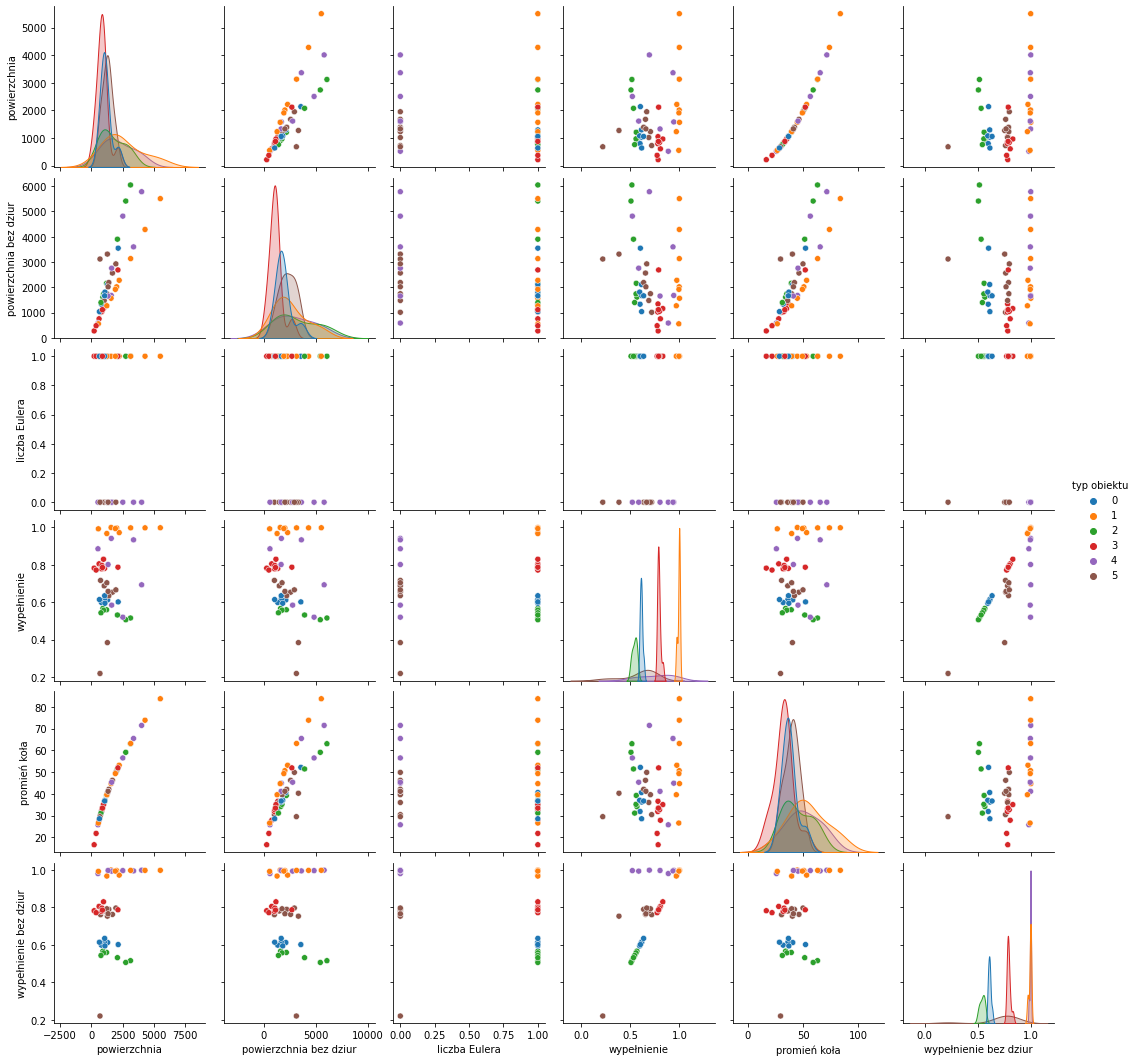

In [50]:
sns.pairplot(cechy, kind="scatter", hue = "typ obiektu", palette = 'tab10')

> **Zadanie** Oceń na podstawie wykresu przydatność cech do rozróżniania klas.

> **Zadanie** Dobierz klasyfikator o jak najwyższej skuteczności dla danych z ramki `cechy`.

---
---
Historia zmian:
* wersja pierwotna r.akad 18/19: 04.2019 (MI)
* wersja r.akad. 19/20: 12.05.2020 (MI)
* wersja r.akad. 20/21: 11.12.2020 (MI)
* wersja r.akad. 21/22: 12.12.2021 b.z. (MI)